# 条码检测-OpenCV

* 支持条码和二维码
* 不支持code128等规格条码
* 0:NONE; 1:EAN_8;2:EAN_13; 3:UPC_A; 4:UPC_E; 5:UPC_EAN_EXTENSION; 
* 可一次检出所有码

## 常用的条码规格

条码可分为 一维码和二维码，每个条码支持的字符以及长度都是有所区别，比如二维码支持中文，而一维码不支持中文，而且不同的一维码也有区别，介绍几种常用一维码支持的字符和长度限制。

常见的条形码有：EAN-13商品条码，Code128码，EAN/Ucc128码，UPC-A码，ITF-14码，交叉25码（code 2of5 Interleaved），矩阵25码（Code 2of5 Matrix），Codabar码，Code93码，SSCC-18码等等。

* EAN-13码和UPC-A码支持的字符范围为0-9数字，EAN-13码长度为13位，UPC-A码长度为13位。
* Code93码支持字符有44个：（0-9）十个数字，（A-Z）二十六个英文大写字母，以及八个特殊字符：“空格符”、“-”、“.”、“*”、“$”、“/”、“+”、“%”，理论上没有长度限制。
* 交叉25码（code 2of5 Interleaved）支持的字符集为0-9数字，理论上长度没有限制，不过只能编码偶数个数字。
* Codabar码是一种可表示数字、字母信息的条形码，其包含20位字符集：数字“0-9”，A、B、C、D四个英文大写字母，以及6个特殊字符（“-”、“:”、“/”、“.”、“+”、“$”），其中A、B、C、D只作起始字符和终止字符使用。理论上长度没有限制。
* Code128码可表示从 ASCII 0 到ASCII 127 共128个字符（其中包含数字，字母，符号），理论上常没有限制。Code128码有三个子集A码、B码、C码：
    * Code128 A码可表示：大写英文字母、数字、控制字符组成的字符串，比如：ABC、ABC123。
    * Code128 B码可表示：大小写英文字母、数字、字符组成的字符串，比如：Abc123、A-123(B)。
    * Code128 C码可表示：仅可表示100个“两位”数字编码（00-99），比如：123456、00225869。
* ITF-14码和矩阵25码（Code 2of5 Matrix）支持字符都为0-9数字，矩阵25码长度13位，ITF-14码长度14位。
* UCC/EAN-128码支持字符为ASCII码，理论上长度不限制。
* SSCC-18严格意义上并不是一种条码类型，而是使用UCC/EAN-128编码的条形码，支持字符也是为全ASCII码，长度为20位，前两位（00）是应用标识符。

## 常用的条码检测库

* Dynamsoft Barcode Reader（商业软件）
* Commercial SDK A（商业软件）
* Commercial SDK B（商业软件）
* BoofCV（开源软件）
* Zxing（开源软件）
* Zbar（开源软件）
* OpenCV（开源软件）

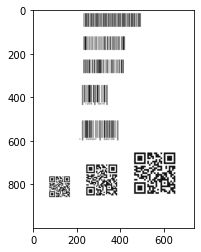

In [1]:
from utils import show
import cv2 as cv
import numpy as np

img = cv.imread(r'pics\barcode_sample1.png')
show(img)

Detect with OpenCV
is_ok: True
bar_info: ('1234567890128', '', '', '', '12345670', '')
bar_type: (2, 0, 0, 0, 1, 0)
points: [[[203.80571  589.0107  ]
  [203.77245  516.74506 ]
  [403.22552  516.6534  ]
  [403.2588   588.919   ]]

 [[216.07422  177.05078 ]
  [216.07422  126.46484 ]
  [441.54297  126.46484 ]
  [441.54297  177.05078 ]]

 [[216.80194  285.47095 ]
  [216.79181  234.88503 ]
  [433.58868  234.84155 ]
  [433.59882  285.4275  ]]

 [[304.23828   68.65234 ]
  [304.23828   25.29297 ]
  [512.3633    25.292969]
  [512.3633    68.65234 ]]

 [[216.07422  422.7539  ]
  [216.07422  350.48828 ]
  [354.82422  350.48828 ]
  [354.82422  422.7539  ]]

 [[228.35938   68.65234 ]
  [228.35938   25.292969]
  [306.40625   25.292969]
  [306.40625   68.65234 ]]]


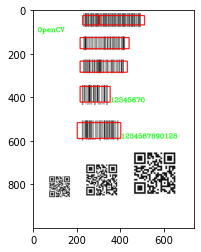

In [2]:
print('Detect with OpenCV')
raw = cv.imread(r'pics\barcode_sample1.png')
img = cv.cvtColor(raw, cv.COLOR_BGR2GRAY)
cv.putText(raw, "OpenCV", (20, 100), cv.FONT_HERSHEY_COMPLEX, 1.0, (0, 255, 0), 2)

detect_obj = cv.barcode_BarcodeDetector()
is_ok, bar_info, bar_type, points = detect_obj.detectAndDecode(img)
print('is_ok:',is_ok)
print('bar_info:',bar_info) 
# 不支持code128等规格条码
# 0:NONE; 1:EAN_8;2:EAN_13; 3:UPC_A; 4:UPC_E; 5:UPC_EAN_EXTENSION; 
print('bar_type:',bar_type) 
print('points:',points)

i = 0
for pos in points:
    color=(0,0,255)
    thick=3
    for p in [(0,1),(1,2),(2,3),(3,0)]:
        start = int(pos[p[0]][0]),int(pos[p[0]][1])
        end = int(pos[p[1]][0]),int(pos[p[1]][1])
        #print(start,end )
        cv.line(raw,start,end,color,thick)

    # cv2.putText(src, text, place, Font, Font_Size, Font_Color, Font_Overstriking)
    cv.putText(raw, bar_info[i], (int(pos[p[0]][0]),int(pos[p[0]][1])), 
        cv.FONT_HERSHEY_COMPLEX, 1.0, (0, 255, 0), 2)
    i += 1

show(raw)


retval True
qr_info: ('1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ', '1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ', '1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ')
points: [[[ 75.      143.     ]
  [169.      144.     ]
  [169.      238.0215 ]
  [ 74.      237.     ]]

 [[465.       34.     ]
  [653.       34.     ]
  [653.      222.     ]
  [465.      222.     ]]

 [[245.       88.     ]
  [385.97873  88.     ]
  [389.      230.     ]
  [243.47311 230.     ]]]
qr_img.shape: 3


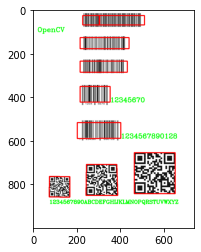

In [3]:
detect_obj = cv.QRCodeDetector()

# show(img[620:900, 0:])
rtn = detect_obj.detectMulti(img)
retval, qr_info, points, qr_imgs = detect_obj.detectAndDecodeMulti(img[620:900, 0:])
print('retval', retval)
print('qr_info:',qr_info)
print('points:',points)
print('qr_img.shape:', len(qr_imgs))

for pos in points:
    color=(0,0,255)
    thick=3
    for p in [(0,1),(1,2),(2,3),(3,0)]:
        start = int(pos[p[0]][0]),int(pos[p[0]][1] + 620)
        end = int(pos[p[1]][0]),int(pos[p[1]][1] + 620)
        #print(start,end )
        cv.line(raw,start,end,color,thick)
cv.putText(raw, qr_info[0], (int(min(points[:, :, 0].flatten())), int(max(points[:, :, 1].flatten())+650)), 
    cv.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 2)    

show(raw)        

cv.imwrite('barcode_opencv_sample1.png', raw)
raw = cv.resize(raw, (int(raw.shape[1]*0.8), int(raw.shape[0]*0.8)))
cv.imshow('barcode_opencv_sample1', raw)
cv.waitKey()
cv.destroyAllWindows()